<a href="https://colab.research.google.com/github/iyogita/Data_Science_Health_Services/blob/main/DataScience_NAGP_3176076.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Science Assignment for Health Services ⚕**

# Load Imports and DataSet



In [72]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
# Set the random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [74]:
# Upload the dataset
uploaded = files.upload()

Saving US_Heart_Patients.csv to US_Heart_Patients (2).csv


In [75]:
# Load the dataset
data_path = 'US_Heart_Patients.csv'
data = pd.read_csv(data_path)


# Perform Exploratory Data Analysis (EDA)

In [76]:
# Display the first 10 rows
print("First 10 rows of the dataset:")
display(data.head(10))

First 10 rows of the dataset:


,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [77]:
# 5-point summary
print("\n5-point summary:")
display(data.describe())


5-point summary:


,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
count,4238.000000,4130.000000,4237.000000,4209.000000,4180.000000,4231.000000,4238.000000,4238.000000,4180.000000,4236.000000,4235.000000,4216.000000,4236.000000,3849.000000,4240.000000
mean,49.579283,1.979903,0.494218,9.001901,0.029665,0.005909,0.310524,0.025720,236.677273,132.362370,82.901889,25.798916,75.867800,81.951936,0.151887
std,8.572875,1.019943,0.500026,11.920742,0.169682,0.076650,0.462763,0.158316,44.616098,22.039244,11.914467,4.075256,11.999488,23.958428,0.358953
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.395000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [78]:
# Information about the columns (data types)
print("\nInformation about the columns:")
display(data.info())


Information about the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), ob

None

In [79]:
# Number of outliers
# Function to detect outliers using IQR
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

In [80]:
print("\nNumber of outliers:")
print(detect_outliers(data.select_dtypes(include=[np.number])))


Number of outliers:
age                  0
education            0
currentSmoker        0
cigsPerDay          12
BP Meds            124
prevalentStroke     25
prevalentHyp         0
diabetes           109
tot cholesterol     56
Systolic BP        126
Diastolic BP        77
BMI                 96
heartRate           75
glucose            188
Heart-Att          644
dtype: int64


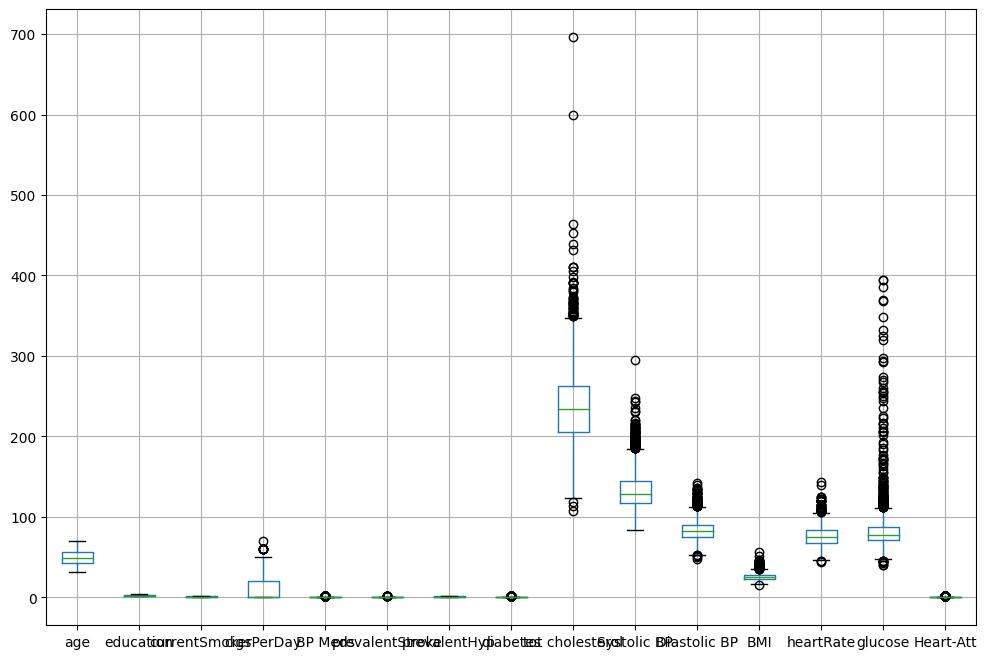

In [81]:
# Checking for outliers using boxplots
plt.figure(figsize=(12, 8))
data.boxplot()
plt.show()

In [82]:
# Detect outliers
def detect_categorical_outliers(df, column):
    expected_categories = ['Male', 'Female']
    # Frequency count of each category
    category_counts = df[column].value_counts()

    # Identify outliers
    outliers = category_counts[~category_counts.index.isin(expected_categories)]

    return outliers

In [83]:
# Detect outliers in 'Gender' column
gender_outliers = detect_categorical_outliers(data, 'Gender')
print("Detected Outliers in 'Gender' column:")
print(gender_outliers)

Detected Outliers in 'Gender' column:
Series([], Name: count, dtype: int64)


In [84]:
# Check for any missing values
print("\nMissing values:")
display(data.isnull().sum())


Missing values:


Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [85]:
# Correlation between variables (excluding non-numeric columns)
numeric_columns = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_columns].corr()

print("\nCorrelation matrix:")
display(correlation_matrix)


Correlation matrix:


,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
age,1.000000,-0.165584,-0.212868,-0.192650,0.123420,0.057811,0.306096,0.101539,0.262766,0.394171,0.205470,0.135013,-0.011286,0.121767,0.226166
education,-0.165584,1.000000,0.017627,0.008257,-0.011071,-0.035254,-0.081289,-0.037550,-0.022926,-0.129614,-0.061678,-0.136673,-0.055574,-0.034838,-0.053857
currentSmoker,-0.212868,0.017627,1.000000,0.769790,-0.049186,-0.033061,-0.103521,-0.044425,-0.046732,-0.130143,-0.107956,-0.166571,0.061614,-0.056546,0.018707
cigsPerDay,-0.192650,0.008257,0.769790,1.000000,-0.046348,-0.032709,-0.066986,-0.037112,-0.026347,-0.089327,-0.057158,-0.093346,0.074742,-0.058460,0.057923
BP Meds,0.123420,-0.011071,-0.049186,-0.046348,1.000000,0.117902,0.261561,0.052008,0.080869,0.254635,0.194487,0.101077,0.015461,0.051282,0.087759
prevalentStroke,0.057811,-0.035254,-0.033061,-0.032709,0.117902,1.000000,0.075048,0.006923,0.000143,0.057292,0.045341,0.025978,-0.017614,0.018463,0.062127
prevalentHyp,0.306096,-0.081289,-0.103521,-0.066986,0.261561,0.075048,1.000000,0.077964,0.164223,0.696447,0.615713,0.301014,0.147548,0.086504,0.176736
diabetes,0.101539,-0.037550,-0.044425,-0.037112,0.052008,0.006923,0.077964,1.000000,0.039732,0.113213,0.051396,0.087547,0.049328,0.617860,0.097485
tot cholesterol,0.262766,-0.022926,-0.046732,-0.026347,0.080869,0.000143,0.164223,0.039732,1.000000,0.208652,0.164058,0.115813,0.091466,0.046644,0.082508
Systolic BP,0.394171,-0.129614,-0.130143,-0.089327,0.254635,0.057292,0.696447,0.113213,0.208652,1.000000,0.784030,0.326623,0.183439,0.140251,0.216287


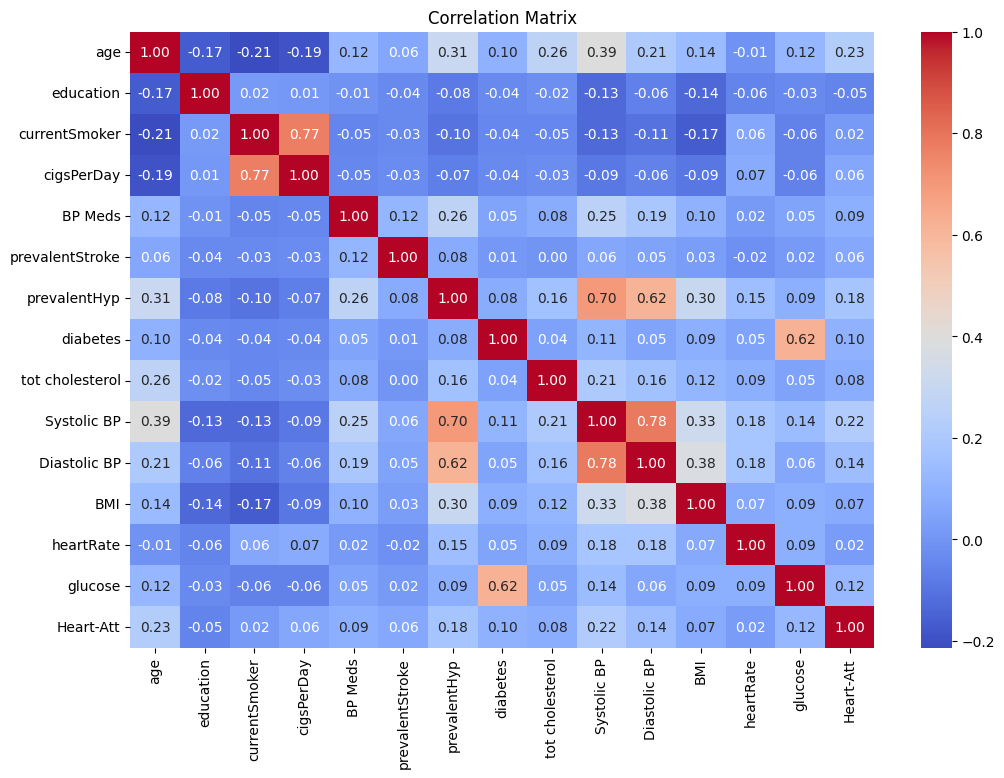

In [86]:
# Plotting correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

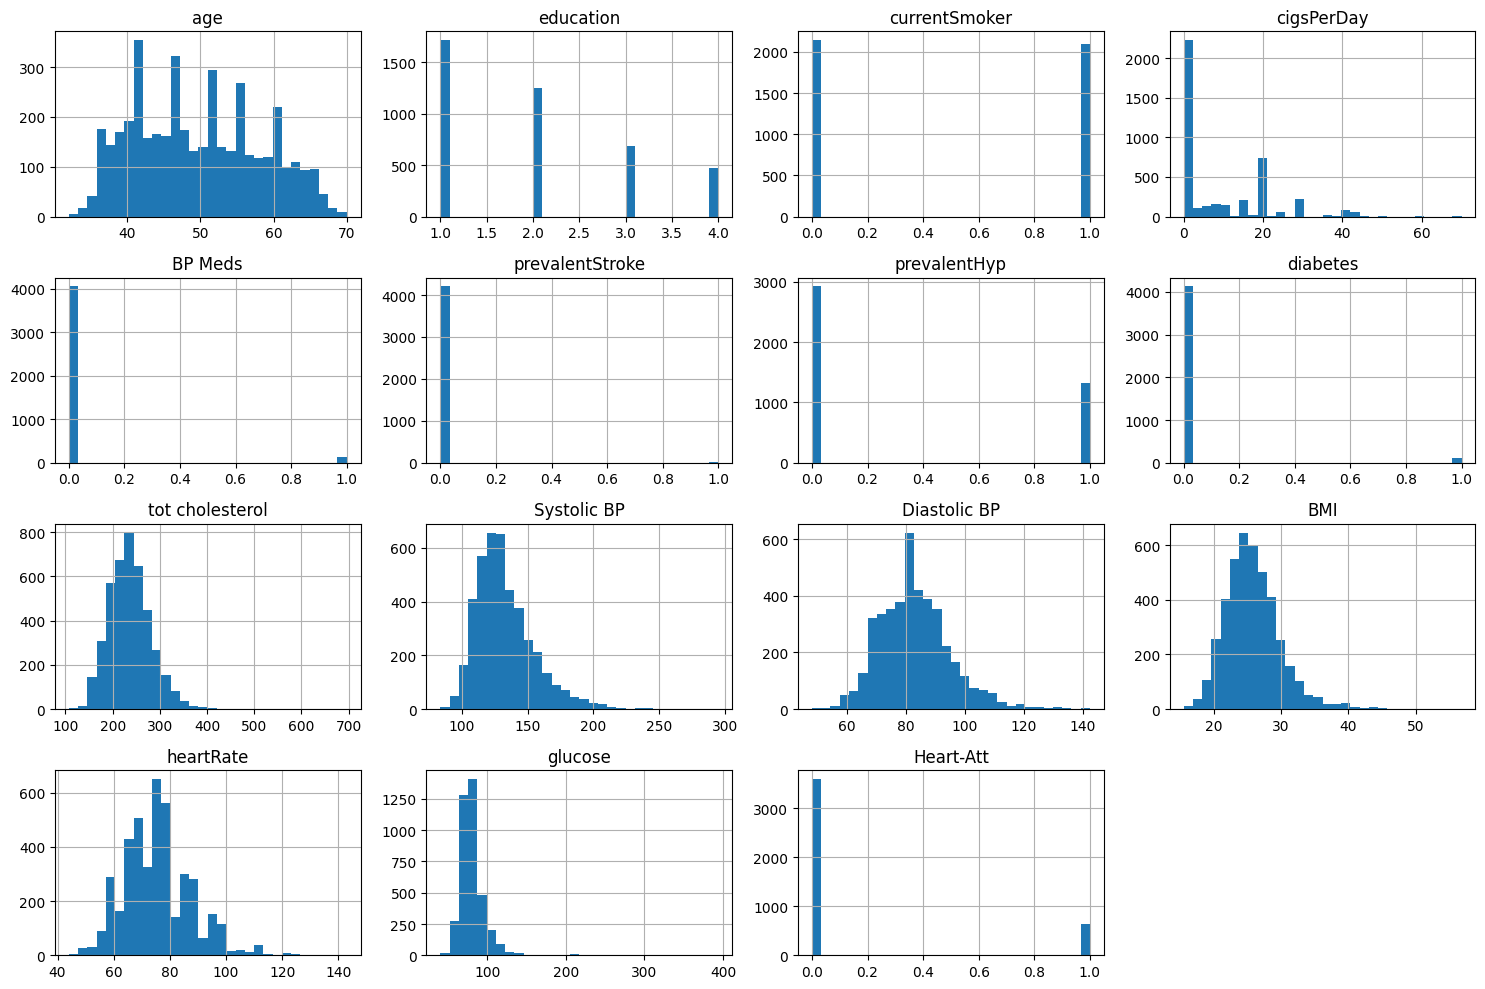

In [87]:
# Distribution of the data
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Data Preprocessing

In [88]:
# Handle missing values
imputer_num = SimpleImputer(strategy='mean')
data[data.select_dtypes(include=[np.number]).columns] = imputer_num.fit_transform(data.select_dtypes(include=[np.number]))

imputer_cat = SimpleImputer(strategy='most_frequent')
data[data.select_dtypes(include=[object]).columns] = imputer_cat.fit_transform(data.select_dtypes(include=[object]))


In [90]:
# Encode categorical features
label_encoders = {}
for column in data.select_dtypes(include=[object]).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [91]:
display(data.head(10))

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
5,0,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0.0
6,0,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1.0
7,0,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0.0
8,1,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0.0
9,1,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0.0


In [89]:
# Check for any remaining missing values
print("\nRemaining missing values:")
display(data.isnull().sum())


Remaining missing values:


Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [92]:
# Outlier treatment, We will handle by capping method
def cap_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    df = np.where(df < lower_cap, lower_cap, df)
    df = np.where(df > upper_cap, upper_cap, df)
    return df

data[numeric_columns] = data[numeric_columns].apply(cap_outliers)

In [93]:
print("\nNumber of outliers:")
print(detect_outliers(data.select_dtypes(include=[np.number])))


Number of outliers:
Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64


# Split the dataset:

In [94]:
X = data.drop('Heart-Att', axis=1)
y = data['Heart-Att']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)


# Model preparation and evaluation

Naive Bayes :

In [95]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [96]:
# Predictions
y_train_pred_nb = nb_model.predict(X_train)
y_test_pred_nb = nb_model.predict(X_test)

In [97]:
# Evaluation
print("\nNaive Bayes - Training Data Evaluation")
display(classification_report(y_train, y_train_pred_nb, zero_division=0))
print("\nNaive Bayes - Testing Data Evaluation")
display(classification_report(y_test, y_test_pred_nb, zero_division=0))


Naive Bayes - Training Data Evaluation


'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00      3392\n\n    accuracy                           1.00      3392\n   macro avg       1.00      1.00      1.00      3392\nweighted avg       1.00      1.00      1.00      3392\n'


Naive Bayes - Testing Data Evaluation


'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00       848\n\n    accuracy                           1.00       848\n   macro avg       1.00      1.00      1.00       848\nweighted avg       1.00      1.00      1.00       848\n'

In [98]:
# Confusion matrix
print("\nConfusion Matrix (Naive Bayes):")
display(confusion_matrix(y_test, y_test_pred_nb))


Confusion Matrix (Naive Bayes):


array([[848]])

Decision Tree :

In [99]:
# Train Decision Tree model with hyperparameter tuning
dt_model = DecisionTreeClassifier(random_state=RANDOM_SEED)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_dt_model = grid_search.best_estimator_

In [100]:
# Predictions
y_train_pred_dt = best_dt_model.predict(X_train)
y_test_pred_dt = best_dt_model.predict(X_test)

In [101]:
# Evaluation
print("\nDecision Tree - Training Data Evaluation")
display(classification_report(y_train, y_train_pred_dt, zero_division=0))
print("\nDecision Tree - Testing Data Evaluation")
display(classification_report(y_test, y_test_pred_dt, zero_division=0))


Decision Tree - Training Data Evaluation


'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00      3392\n\n    accuracy                           1.00      3392\n   macro avg       1.00      1.00      1.00      3392\nweighted avg       1.00      1.00      1.00      3392\n'


Decision Tree - Testing Data Evaluation


'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00       848\n\n    accuracy                           1.00       848\n   macro avg       1.00      1.00      1.00       848\nweighted avg       1.00      1.00      1.00       848\n'

In [102]:
# Confusion matrix
print("\nConfusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_test_pred_dt))


Confusion Matrix (Decision Tree):
[[848]]


In [103]:
# Calculate F1 Scores
f1_nb = f1_score(y_test, y_test_pred_nb, average='weighted', zero_division=0)
f1_dt = f1_score(y_test, y_test_pred_dt, average='weighted', zero_division=0)

In [104]:
print(f"\nF1 Score (Naive Bayes): {f1_nb}")
print(f"F1 Score (Decision Tree): {f1_dt}")


F1 Score (Naive Bayes): 1.0
F1 Score (Decision Tree): 1.0


Choosing the Best Model :

In [105]:
# Pick the best model based on F1 Score
best_model_name = "Naive Bayes" if f1_nb > f1_dt else "Decision Tree"
print(f"\nThe best model is: {best_model_name}")

# Explain the best model's confusion matrix and classification report
if best_model_name == "Naive Bayes":
    best_model_confusion_matrix = confusion_matrix(y_test, y_test_pred_nb)
    best_model_classification_report = classification_report(y_test, y_test_pred_nb, zero_division=0)
else:
    best_model_confusion_matrix = confusion_matrix(y_test, y_test_pred_dt)
    best_model_classification_report = classification_report(y_test, y_test_pred_dt, zero_division=0)

print(f"\nConfusion Matrix ({best_model_name}):")
print(best_model_confusion_matrix)

print(f"\nClassification Report ({best_model_name}):")
print(best_model_classification_report)


The best model is: Decision Tree

Confusion Matrix (Decision Tree):
[[848]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       848

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848

